In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
'''Reading the dataset from the link'''

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [7]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
'''Filtering the data for ocean_proximity = <1H OCEAN or INLAND'''

df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

In [15]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.00,15687.00,15687.00,15687.00,15530.00,15687.00,15687.00,15687.00,15687.00
mean,-119.22,35.47,27.19,2665.68,541.24,1466.32,500.92,3.80,191943.02
std,1.78,2.07,12.06,2257.67,435.65,1180.39,392.76,1.86,108801.08
min,-124.14,32.61,1.00,2.00,2.00,3.00,2.00,0.50,14999.00
25%,-121.07,33.94,17.00,1441.00,295.00,802.00,278.00,2.52,111300.00
50%,-118.37,34.16,27.00,2118.00,432.00,1195.00,406.00,3.47,166900.00
75%,-117.99,37.34,36.00,3172.00,645.00,1777.00,602.00,4.69,241100.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [19]:
'''Filling missing values with 0'''

df = df.fillna(0)

In [20]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.00,15687.00,15687.00,15687.00,15687.00,15687.00,15687.00,15687.00,15687.00
mean,-119.22,35.47,27.19,2665.68,535.83,1466.32,500.92,3.80,191943.02
std,1.78,2.07,12.06,2257.67,436.80,1180.39,392.76,1.86,108801.08
min,-124.14,32.61,1.00,2.00,0.00,3.00,2.00,0.50,14999.00
25%,-121.07,33.94,17.00,1441.00,291.00,802.00,278.00,2.52,111300.00
50%,-118.37,34.16,27.00,2118.00,429.00,1195.00,406.00,3.47,166900.00
75%,-117.99,37.34,36.00,3172.00,642.00,1777.00,602.00,4.69,241100.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


/var/folders/hq/dmjxvds52ldbnl7q29lhhjxc0000gn/T/ipykernel_9505/2624295110.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.median_house_value)


<Axes: xlabel='median_house_value', ylabel='Density'>

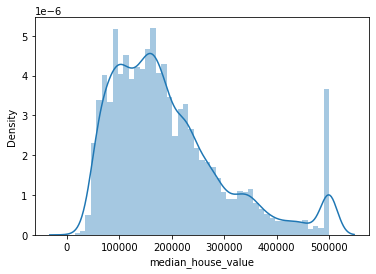

In [23]:
'''Checking the distribution of median_house_value'''

sns.distplot(df.median_house_value)

In [24]:
'''Applying the log transformation to median_house_value to shorten the tail and handle extreme values'''

df['median_house_value'] = np.log1p(df.median_house_value)

/var/folders/hq/dmjxvds52ldbnl7q29lhhjxc0000gn/T/ipykernel_9505/2548506570.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.median_house_value)


<Axes: xlabel='median_house_value', ylabel='Density'>

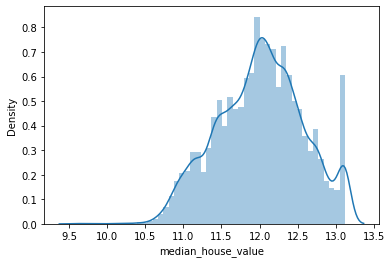

In [25]:
sns.distplot(df.median_house_value)

In [27]:
'''Splitting the data into train, test and validation sets'''

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train.shape, df_val.shape, df_test.shape

((9411, 10), (3138, 10), (3138, 10))

In [30]:
ytrain = df_train.median_house_value.values
yval = df_val.median_house_value.values
ytest = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [38]:
'''Converting dataframes to dictionaries and encoding them using DictVectorizer'''

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [39]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [43]:
'''Training a Decision Tree Regressor model with max_depth=1'''

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, ytrain)


DecisionTreeRegressor(max_depth=1)

In [47]:
dt.decision_path(X_train)

<9411x3 sparse matrix of type '<class 'numpy.int64'>'
	with 18822 stored elements in Compressed Sparse Row format>

In [48]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [49]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [51]:
'''Plotting the decision tree'''

print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



## Answer 1: ocean_proximity

In [60]:
'''Training a Random Forest Regressor model with n_estimators=10'''

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, ytrain)

'''Calculating the validation RMSE'''

y_pred = rf.predict(X_val)

rmse = np.sqrt(((yval - y_pred)**2).mean())

print(f'The validation RMSE is {rmse:.3f}')

The validation RMSE is 0.245


## Answer 2: RMSE on validation set for RF Regressor is 0.245

<Axes: xlabel='n_estimators', ylabel='rmse'>

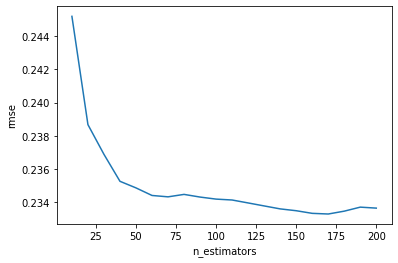

In [61]:
'''Changing the n_estimators between 10 to 200 with step size 10 and plotting the validation RMSE'''

scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, ytrain)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(((yval - y_pred)**2).mean())
    scores.append((n, rmse))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

sns.lineplot(x='n_estimators', y='rmse', data=df_scores)

In [63]:
df_scores.round(3)

,n_estimators,rmse
0,10,0.245
1,20,0.239
2,30,0.237
3,40,0.235
4,50,0.235
5,60,0.234
6,70,0.234
7,80,0.234
8,90,0.234
9,100,0.234


## Answer 3: based on the above plot, rmse stops improving after n_estimators cross 160

<Axes: xlabel='n_estimators', ylabel='rmse'>

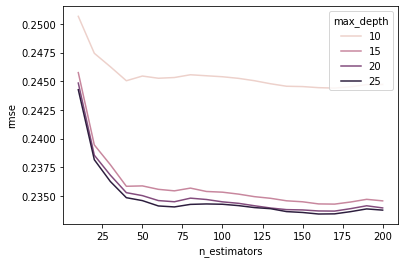

In [64]:
'''Changing the max_depth between 10, 15, 20 and 25, for each of these try different values of n_estimators from 10 till 200 (with step 10), caluculate the mean RMSE for each combination and plot the results'''

scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X_train, ytrain)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(((yval - y_pred)**2).mean())
        scores.append((d, n, rmse))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])

sns.lineplot(x='n_estimators', y='rmse', hue='max_depth', data=df_scores)

In [66]:
df_scores.round(3)

,max_depth,n_estimators,rmse
0,10,10,0.251
1,10,20,0.247
2,10,30,0.246
3,10,40,0.245
4,10,50,0.245
...,...,...,...
75,25,160,0.233
76,25,170,0.233
77,25,180,0.234
78,25,190,0.234


In [73]:
'''Finding the mean RMSE for each max_depth'''

df_scores.groupby('max_depth').agg({'rmse': 'mean'}).round(4).sort_values(by='rmse')

,rmse
max_depth,
25,0.2348
20,0.2352
15,0.2359
10,0.2455


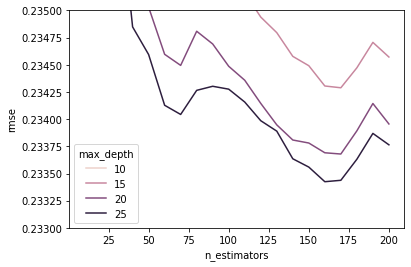

In [75]:
sns.lineplot(x='n_estimators', y='rmse', hue='max_depth', data=df_scores)
ylim = plt.ylim(0.2330,0.2350)

## Answer 4: Best max_depth is 25

<Axes: xlabel='importance', ylabel='feature'>

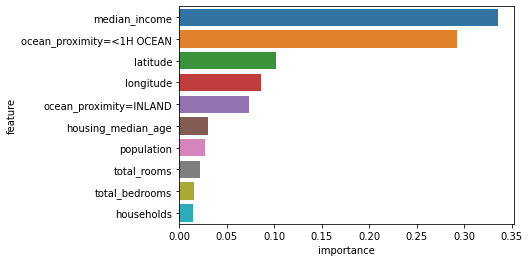

In [79]:
'''Training a Random Forest Regressor model with n_estimators=10 and max_depth=20'''

rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

rf.fit(X_train, ytrain)

'''Retriveing the feature importance from the model and plotting it'''

imp = pd.DataFrame({
    'feature': dv.get_feature_names_out(),
    'importance': rf.feature_imbmportances_
})

imp = imp.sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=imp)

## Answer 5: Most important feature is median_income

In [109]:
'''Running a XGBoost model'''

# Replacing the =< & = for feature names with _ as they are not allowed in XGBoost idk why
features = dv.get_feature_names_out()

features= [i.replace("=<", "_").replace("=","_") for i in features]

dtrain = xgb.DMatrix(X_train, label=ytrain, feature_names=features)
dval = xgb.DMatrix(X_val, label=yval, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]


In [110]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

'''Calculating the validation RMSE'''

y_pred = model.predict(dval)

rmse = np.sqrt(((yval - y_pred)**2).mean())

print(f'The validation RMSE is {rmse:.3f}')

[0]	train-rmse:0.44350	val-rmse:0.44250
[1]	train-rmse:0.36599	val-rmse:0.36916
[2]	train-rmse:0.31556	val-rmse:0.32382
[3]	train-rmse:0.28541	val-rmse:0.29965
[4]	train-rmse:0.26573	val-rmse:0.28417
[5]	train-rmse:0.25338	val-rmse:0.27463
[6]	train-rmse:0.24157	val-rmse:0.26770
[7]	train-rmse:0.23486	val-rmse:0.26423
[8]	train-rmse:0.22668	val-rmse:0.25820
[9]	train-rmse:0.21995	val-rmse:0.25444
[10]	train-rmse:0.21444	val-rmse:0.25179
[11]	train-rmse:0.21155	val-rmse:0.25054
[12]	train-rmse:0.20729	val-rmse:0.24791
[13]	train-rmse:0.20317	val-rmse:0.24628
[14]	train-rmse:0.20135	val-rmse:0.24630
[15]	train-rmse:0.19858	val-rmse:0.24522
[16]	train-rmse:0.19580	val-rmse:0.24445
[17]	train-rmse:0.19333	val-rmse:0.24395
[18]	train-rmse:0.19107	val-rmse:0.24284
[19]	train-rmse:0.18735	val-rmse:0.24127
[20]	train-rmse:0.18524	val-rmse:0.23978
[21]	train-rmse:0.18332	val-rmse:0.23963
[22]	train-rmse:0.18189	val-rmse:0.23892
[23]	train-rmse:0.18006	val-rmse:0.23847
[24]	train-rmse:0.17869	va

In [111]:
'''Changing the eta from 0.3 to 0.1 and plotting the validation RMSE'''

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

'''Calculating the validation RMSE'''

y_pred = model.predict(dval)

rmse = np.sqrt(((yval - y_pred)**2).mean())

print(f'The validation RMSE is {rmse:.3f}')

[0]	train-rmse:0.52449	val-rmse:0.52045
[1]	train-rmse:0.48736	val-rmse:0.48443
[2]	train-rmse:0.45433	val-rmse:0.45293
[3]	train-rmse:0.42533	val-rmse:0.42550
[4]	train-rmse:0.39987	val-rmse:0.40144
[5]	train-rmse:0.37822	val-rmse:0.38151
[6]	train-rmse:0.35887	val-rmse:0.36393
[7]	train-rmse:0.34177	val-rmse:0.34838
[8]	train-rmse:0.32701	val-rmse:0.33492
[9]	train-rmse:0.31411	val-rmse:0.32333
[10]	train-rmse:0.30326	val-rmse:0.31427
[11]	train-rmse:0.29355	val-rmse:0.30615
[12]	train-rmse:0.28519	val-rmse:0.29922
[13]	train-rmse:0.27760	val-rmse:0.29269
[14]	train-rmse:0.27116	val-rmse:0.28796
[15]	train-rmse:0.26538	val-rmse:0.28380
[16]	train-rmse:0.26012	val-rmse:0.27970
[17]	train-rmse:0.25583	val-rmse:0.27661
[18]	train-rmse:0.25203	val-rmse:0.27388
[19]	train-rmse:0.24818	val-rmse:0.27123
[20]	train-rmse:0.24512	val-rmse:0.26882
[21]	train-rmse:0.24149	val-rmse:0.26669
[22]	train-rmse:0.23895	val-rmse:0.26478
[23]	train-rmse:0.23594	val-rmse:0.26331
[24]	train-rmse:0.23305	va

## Answer 6:  eta == 0.3 gives better rmse on the validation set

### FIN